In [1]:
import os
import collections

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np


import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms


import datetime


In [2]:
data_path = 'data/'

if not os.path.exists(data_path):
    os.makedirs(data_path)

cifar10_train = datasets.CIFAR10(data_path, train=True, download=True)
print("Size of the training dataset", len(cifar10_train))


cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) 
print("Size of the validation dataset", len(cifar10_val))



Files already downloaded and verified
Size of the training dataset 50000
Files already downloaded and verified
Size of the validation dataset 10000


In [3]:
import itertools

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

def plotClass(class_num, pictures_num):
    ''' Generic function for visualizing the different classes
        Note: I have no clue how pyplot works, so this probably
        breaks common practice'''

    fig = plt.figure(figsize=(10,3))
    pictures_num = min(max(pictures_num,1), 5)
    
    iterator = (img for img, label in cifar10_train if label == class_num)
    images = itertools.islice(iterator, pictures_num)
    
    plt.axis('off')
    plt.title(class_names[class_num])
    
    for i in range(pictures_num):        
        ax = fig.add_subplot(1, pictures_num, 1 + i, xticks=[], yticks=[])
        img = next(images)
        plt.imshow(img)




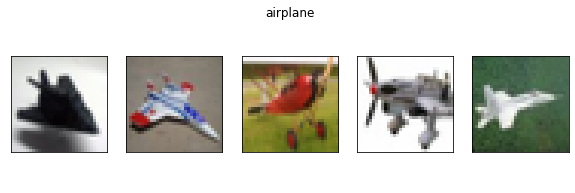

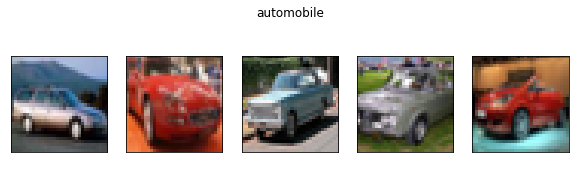

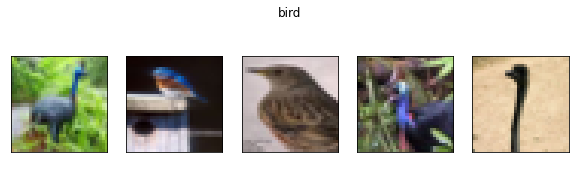

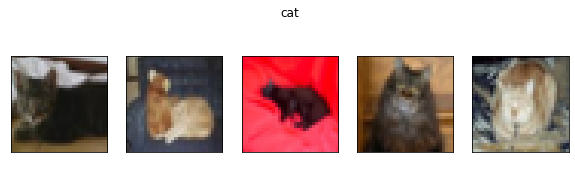

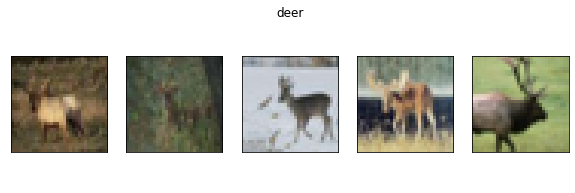

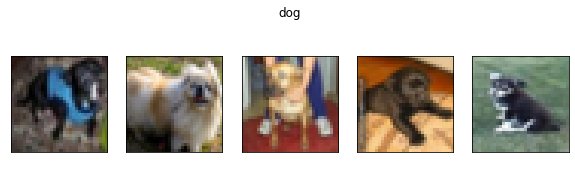

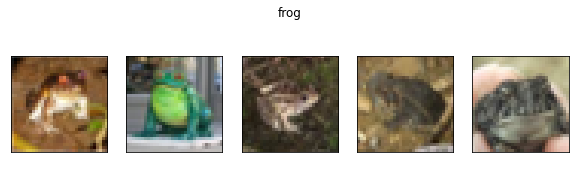

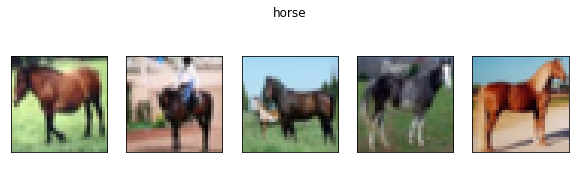

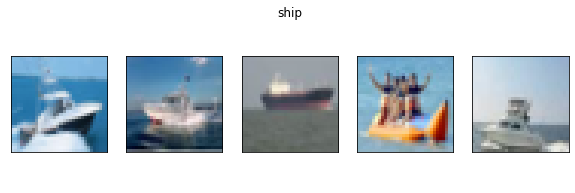

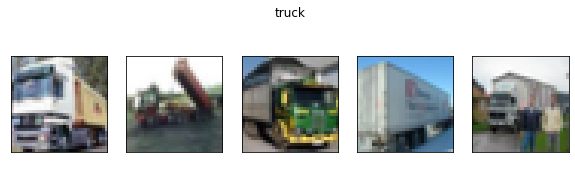

In [4]:
num_pics = 5
for i in range(len(class_names)):
    plotClass(i, num_pics)

### Exercise 2
Above I've visualized a few samples as requested. And it is quite clear to me that this will be a much more difficult task to accomplish. The variation in the images above are huge compared to the numbers we've previously encountered. Not to mention that this weeks assignment has 3 color channels as well. As of right now im unsure if the network will have decent accuracy. No doubt much worse than last week.  



In [5]:
# Where to find the data or where to download the data if not found
data_path = 'data/'

# Instantiates a dataset for the training data and downloads the data if it is not present
cifar10_train = datasets.CIFAR10(
    data_path,       # location from which the data will be downloaded
    train=True,      # says whether we’re interested in the training set or the validation set
    download=True,   # says whether we allow PyTorch to download the data if not found in 'data_path'
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

print('Size of the training dataset: ', len(cifar10_train))

cifar10_val = datasets.CIFAR10(
    data_path, 
    train=False,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
print('Size of the validation dataset: ', len(cifar10_val))

train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

Files already downloaded and verified
Size of the training dataset:  50000
Files already downloaded and verified
Size of the validation dataset:  10000


In [6]:
class_names = ['airplane','automobile','bird','cat']

cifar4_train = [(img, label)
          for img, label in cifar10_train
          if label in [0,1,2,3]]
print('Size of the training dataset: ', len(cifar4_train))

cifar4_val = [(img, label)
              for img, label in cifar10_val
              if label in [0,1,2,3]]

print('Size of the validation dataset: ', len(cifar4_val))

train_loader = torch.utils.data.DataLoader(cifar4_train, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar4_val, batch_size=64, shuffle=False)

Size of the training dataset:  20000
Size of the validation dataset:  4000


### Slow training...
I initially tried to train on the entire dataset, and thought "cool 2-3 minutes every ten epochs". But when reviewing Natacha's tutorials i noticed her model trained ten epochs every couple of seconds. This made me realize that my gpu is a bit to slow :(. I dont fully understand how it works, but it seems my computer does not utilize the entire gpu. It's never above 10%. Note: That im training on a laptop. Im guessing it's somehow to do with that.

Anyway, i decided to reduce the dataset. I chose to go with the first 4 categories.

In [7]:
dev = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
from torch import nn
from torch import optim
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride = 1, padding = 0)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0)
        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)
        self.tanh = nn.Tanh()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv1(x)    # Conv1
        x = self.tanh(x)     # Activation1
        x = self.maxpool(x)  # Pool1
        
        x = self.conv2(x)    # Conv2
        x = self.tanh(x)     # Activation2
        x = self.maxpool(x)  # Pool2
        
        x = x.reshape(x.shape[0], -1)

        x = self.tanh(x)
        x = self.fc1(x)
        
        x = self.tanh(x)
        x = self.fc2(x)
        
        x = self.tanh(x)
        x = self.fc3(x)

        return x
    
#img_t, _ = transformed_cifar10_train[1]
lenet = LeNet()


In [9]:

class LeNetIsh(nn.Module):
    def __init__(self):
        super(LeNetIsh, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride = 1, padding = 0)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = 2, stride = 1, padding = 0)
        
        self.fc1 = nn.Linear(1920, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128,10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        #x = x.unsqueeze(0)
        x = self.conv1(x)    # Conv1
        x = self.relu(x)     # Activation1
        x = self.maxpool(x)  # Pool1
        
        x = self.conv2(x)    # Conv2
        x = self.relu(x)     # Activation2
        x = self.maxpool(x)  # Pool2
        
        x = self.conv3(x)    # Conv3
        x = self.relu(x)     # Activation3
        
        x = x.reshape(x.shape[0], -1)
        
        x = self.relu(x)
        x = self.fc1(x)
        
        x = self.relu(x)
        x = self.fc2(x)
        
        x = self.relu(x)
        x = self.fc3(x)
        
        x = self.relu(x)
        x = self.fc4(x)
        
        x = self.relu(x)
        x = self.fc5(x)

        return x
lenetish = LeNetIsh()
print(lenetish)

LeNetIsh(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=1920, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


### LeNet-Ish
I first created a model similar to LeNet as described in Andrews video. This model has two convolutional layers, and a maxpool after each one. After these layers the model turns more linear, with two fully connected layers of decreasing size. I chose to consistently use the TanH activation function although not spesifically expressed in the video. As i use a decreased dataset i also added a third linear layer from 84 to 4 so the output matches

When creating this model i struggled a bit with getting the inputs/outputs of each layer to match. Last week this was quite simple as all layers were linear and could simply be piped along through the network. This week required a little more thinking. And i must admit that i don't fully understand how these layers work / change shape quite yet. 

I decided to expand upon the initial LeNet network to experiment a bit with these layers. Specifically the conv-layer. I added a third conv layer, and changed up the parameters such that the output equals 16*120. Then i flattened this, and piped it through a section of linear layers. I also changed the activation function from tanH to ReLU. I read that the more modern "approach" used ReLU instead of tanh somewhere. The new network outperformed the old by quite a lot, atleast during training. 
I decided not to use the "new"-network further in the report.

In [10]:
history = {}

def training_loop_on_gpu(n_epochs, optimizer, model, loss_fn, train_loader, history = {}):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        acc_train = 0.0
        model.train()
        for imgs, labels in train_loader:

            imgs = imgs.to(dev) 
            labels = labels.to(dev)

            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            _, pred = torch.max(outputs, 1)
            acc_train += int((pred == labels).sum())

            loss_train += loss.item()
            
        epoch_training_acc = acc_train / len(train_loader)
        epoch_training_loss = loss_train / len(train_loader)
        
        history['training_loss'][epoch] = epoch_training_loss
        history['training_acc'][epoch] = epoch_training_acc
        
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                epoch_training_loss))

In [11]:
lenet.to(dev) 
optimizer = optim.SGD(lenet.parameters(), lr=1e-2, momentum = 0.9)
loss_fn = nn.CrossEntropyLoss()

history = {}
history['training_loss'] = {}
history['training_acc'] = {}


training_loop_on_gpu(
    n_epochs = 150,
    optimizer = optimizer,
    model = lenet,
    loss_fn = loss_fn,
    train_loader = train_loader,
    history = history,
)

2021-02-14 17:41:42.477379 Epoch 1, Training loss 0.973836922797913
2021-02-14 17:41:53.780643 Epoch 10, Training loss 0.4876239590180187
2021-02-14 17:42:07.216978 Epoch 20, Training loss 0.3460161379827097
2021-02-14 17:42:20.711055 Epoch 30, Training loss 0.22582815942196802
2021-02-14 17:42:32.933424 Epoch 40, Training loss 0.14400000692294618
2021-02-14 17:42:45.720739 Epoch 50, Training loss 0.06737129305736325
2021-02-14 17:42:58.111651 Epoch 60, Training loss 0.03544061430119954
2021-02-14 17:43:10.408248 Epoch 70, Training loss 0.02048636296133216
2021-02-14 17:43:23.601047 Epoch 80, Training loss 0.0069208325766668185
2021-02-14 17:43:37.456204 Epoch 90, Training loss 0.0007488816740741126
2021-02-14 17:43:50.195073 Epoch 100, Training loss 0.0003789987432928131
2021-02-14 17:44:02.737518 Epoch 110, Training loss 0.0002688204463708554
2021-02-14 17:44:16.250658 Epoch 120, Training loss 0.00021377317783374044
2021-02-14 17:44:29.148766 Epoch 130, Training loss 0.00017924237528

In [12]:
# Again shuffle = False for the validation phase
train_loader = torch.utils.data.DataLoader(cifar4_train, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar4_val, batch_size=64, shuffle=False)
all_acc_dict = collections.OrderedDict()

def validate_on_gpu(model, train_loader, val_loader):
    accdict = {}
    model.eval()
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:

                imgs = imgs.to(dev)
                labels = labels.to(dev)

                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict



In [13]:
all_acc_dict["baseline"] = validate_on_gpu(lenet, train_loader, val_loader)

Accuracy train: 1.00
Accuracy val: 0.75


##### Clearly overfit.
The model is clearly overfit, with almost 100% accuracy on the training-data and "just" 75%-ish on the validation-set. I expected the validation accuracy to be quite a bit lower. I even tried to forcefully overfit the model for a few hours by tweaking parameters and such. I gave up after a while when the results did'nt dip as i wanted them to.

In [14]:
def plotHistory(epochs, history, ylabel):
    ''' Generalized function to generate plots showing statistics over time/mini-batches
    I chose to go with "dots" instead of a line. Since the line looked quite sporadic'''
        
    plt.figure(figsize=(14, 7))

    plt.xlabel('Epoch:')
    plt.ylabel(ylabel)
    
    epochs = history.keys()
    data = history.values()
    
    plt.plot(epochs, data)
    
    plt.show()

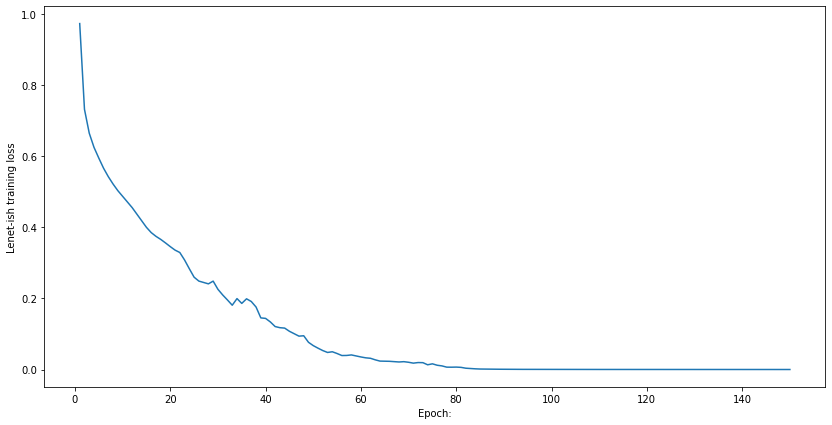

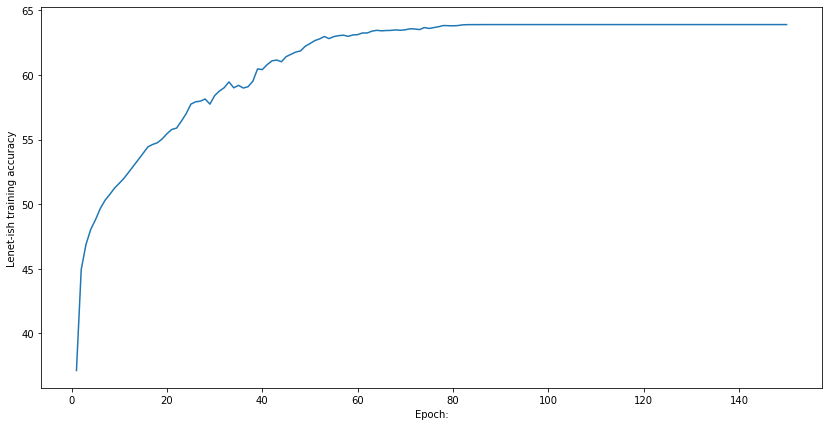

In [15]:
plotHistory(len(history['training_loss']), history['training_loss'], "Lenet-ish training loss")
plotHistory(len(history['training_acc']), history['training_acc'], "Lenet-ish training accuracy")


As seen in the images the model looks quite overfit. With a constant 100% accuracy and 0 loss from around the 100th epoch. I know this should be compared with the validation-set to create a clear image of how the model fits, but i couldnt find a nice way to visualize this. I would have liked to plot the images as dots in a 2d plane, then based on the models prediction (correct/incorrect) color the dots either for instance red or blue. 

In [16]:


transform_train = transforms.Compose([ # Some simple data augmentation.
    transforms.RandomCrop(32,padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616)),
])


transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616)),
])


I chose horizontal-flip because a car is still a car when seen from the wrong direction. I felt like i needed more augmentation so i added a randomcrop also. 

In the test/val set I don't augment the data at all.

In [17]:
data_path = 'data/'
class_names = ['airplane','automobile','bird','cat']

cifar10_train = datasets.CIFAR10(
    data_path,
    train=True,
    download=True,  
    transform=transform_train) # Load data with new transformer

cifar10_val = datasets.CIFAR10(
    data_path, 
    train=False,
    download=True,
    transform=transform_test)


cifar4_train = [(img, label)
          for img, label in cifar10_train
          if label in [0,1,2,3]]
print('Size of the training dataset: ', len(cifar4_train))

cifar4_val = [(img, label)
              for img, label in cifar10_val
              if label in [0,1,2,3]]

print('Size of the validation dataset: ', len(cifar4_val))

train_loader = torch.utils.data.DataLoader(cifar4_train, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar4_val, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified
Size of the training dataset:  20000
Size of the validation dataset:  4000


In [18]:

# Initialize new "empty" network
lenet = LeNet().to(dev)

# Some changes to the optimization algorithm. I tried a couple of the "more-modern" algorithms such as Adam and got better
# results. However it felt unfair to not use the same (SGD) on both. 
# I did do a little tuning of the hyperparams. Lowered learningrate, added momentum, and of course added L2-regularization
optimizer = optim.SGD(lenet.parameters(), lr = 0.001, momentum = 0.9, weight_decay=0.01)
loss_fn = nn.CrossEntropyLoss()


training_loop_on_gpu(
    n_epochs = 150,
    optimizer = optimizer,
    model = lenet,
    loss_fn = loss_fn,
    train_loader = train_loader,
    history = history,
)

2021-02-14 17:45:17.062863 Epoch 1, Training loss 1.3276259167887532
2021-02-14 17:45:28.756723 Epoch 10, Training loss 0.788245775829108
2021-02-14 17:45:42.471558 Epoch 20, Training loss 0.7092127923767406
2021-02-14 17:45:55.079116 Epoch 30, Training loss 0.6626800921397468
2021-02-14 17:46:07.710201 Epoch 40, Training loss 0.6301370921035925
2021-02-14 17:46:20.636996 Epoch 50, Training loss 0.6055287101779121
2021-02-14 17:46:33.624238 Epoch 60, Training loss 0.5865210753660233
2021-02-14 17:46:46.266860 Epoch 70, Training loss 0.5716496049024807
2021-02-14 17:46:58.974429 Epoch 80, Training loss 0.560261541852555
2021-02-14 17:47:11.880857 Epoch 90, Training loss 0.5514585680474108
2021-02-14 17:47:24.576373 Epoch 100, Training loss 0.5442571784741581
2021-02-14 17:47:38.419669 Epoch 110, Training loss 0.5385707567294185
2021-02-14 17:47:51.953094 Epoch 120, Training loss 0.5339578805259242
2021-02-14 17:48:04.791364 Epoch 130, Training loss 0.5299923413287336
2021-02-14 17:48:17

In [19]:
all_acc_dict["L2-norm"] = validate_on_gpu(lenet, train_loader, val_loader)

Accuracy train: 0.80
Accuracy val: 0.80


### No longer overfit!
The model seems to no longer overfit during training. The accuracy of the during validation is actually higher that during training. The model also seems to generalize a bit better than before, although this is not by much... It correctly guesses 80% of the time on the reduced dataset cifar4.

I visualized a batch of predictions and expected values below. Aswell as a "unnormalized" image.

Expected:   cat
Prediction: cat
Confidence: 83.8%


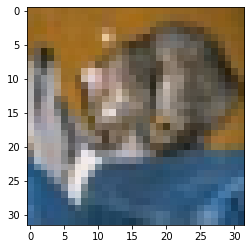


Expected:   airplane
Prediction: airplane
Confidence: 89.63%


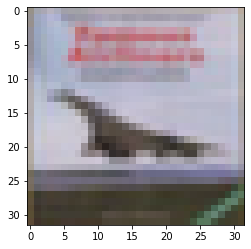

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   automobile
Prediction: automobile
Confidence: 61.53%


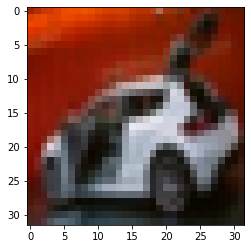


Expected:   cat
Prediction: cat
Confidence: 85.67%


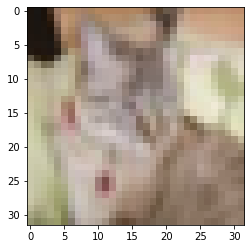


Expected:   automobile
Prediction: automobile
Confidence: 99.72%


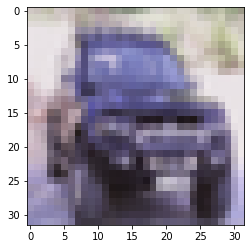


Expected:   airplane
Prediction: airplane
Confidence: 74.11%


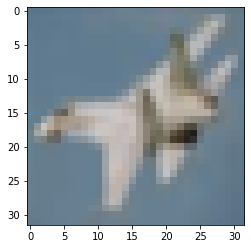

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   airplane
Prediction: airplane
Confidence: 84.74%


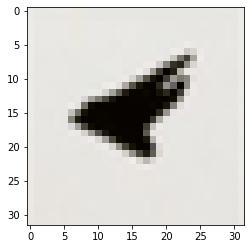


Expected:   bird
Prediction: bird
Confidence: 90.13%


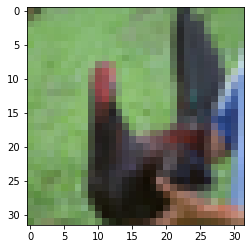


Expected:   airplane
Prediction: bird
Confidence: 75.0%


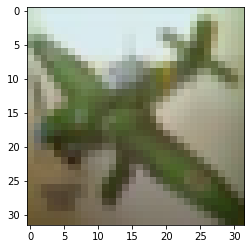

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   bird
Prediction: cat
Confidence: 77.46%


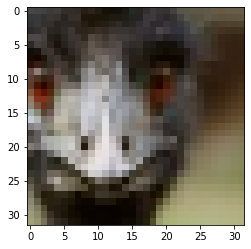


Expected:   automobile
Prediction: automobile
Confidence: 96.03%


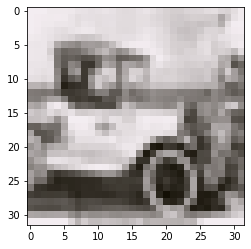

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   airplane
Prediction: airplane
Confidence: 93.19%


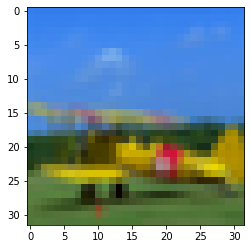


Expected:   cat
Prediction: cat
Confidence: 80.73%


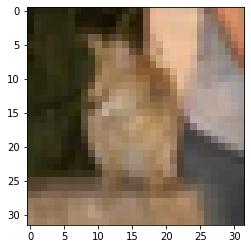


Expected:   airplane
Prediction: bird
Confidence: 57.1%


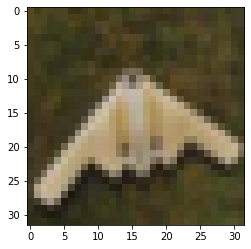

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: cat
Confidence: 57.53%


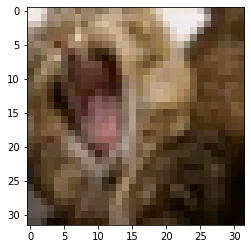

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: cat
Confidence: 80.28%


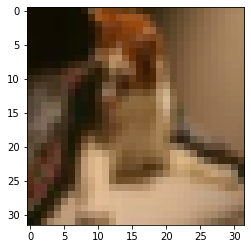

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: automobile
Confidence: 53.84%


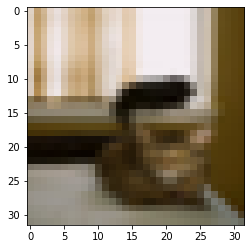

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   bird
Prediction: bird
Confidence: 61.78%


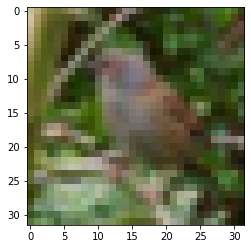

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   automobile
Prediction: automobile
Confidence: 90.29%


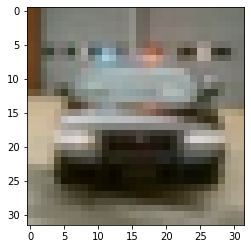


Expected:   bird
Prediction: airplane
Confidence: 66.4%


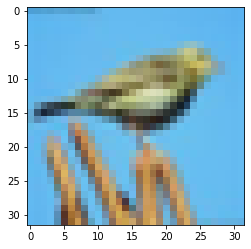

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: cat
Confidence: 97.48%


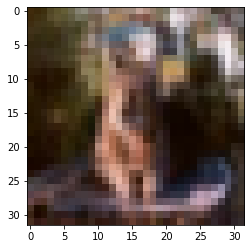


Expected:   bird
Prediction: bird
Confidence: 42.67%


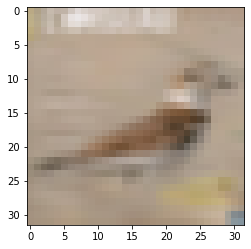

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   airplane
Prediction: airplane
Confidence: 73.01%


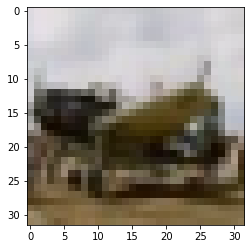

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   bird
Prediction: bird
Confidence: 98.18%


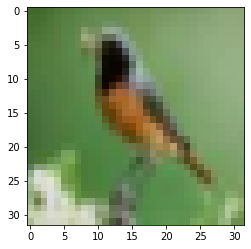


Expected:   cat
Prediction: cat
Confidence: 93.55%


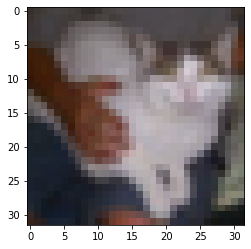

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: cat
Confidence: 95.84%


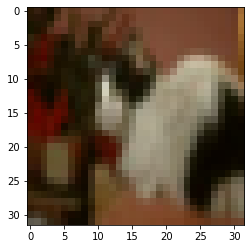

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   automobile
Prediction: automobile
Confidence: 97.08%


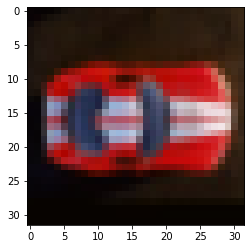


Expected:   automobile
Prediction: automobile
Confidence: 82.13%


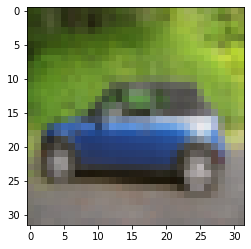


Expected:   bird
Prediction: cat
Confidence: 50.19%


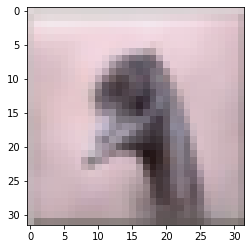

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   bird
Prediction: airplane
Confidence: 39.48%


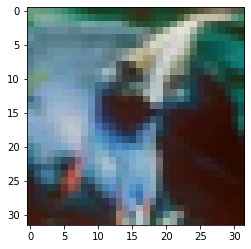


Expected:   airplane
Prediction: airplane
Confidence: 93.3%


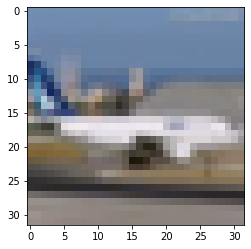


Expected:   cat
Prediction: bird
Confidence: 75.34%


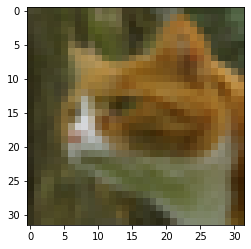


Expected:   airplane
Prediction: airplane
Confidence: 59.8%


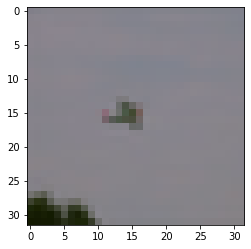

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   airplane
Prediction: airplane
Confidence: 81.77%


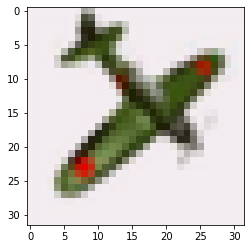

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: cat
Confidence: 86.25%


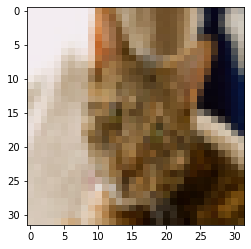


Expected:   automobile
Prediction: automobile
Confidence: 89.5%


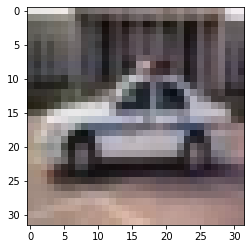

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   automobile
Prediction: automobile
Confidence: 87.5%


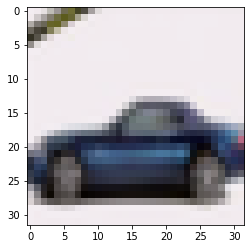


Expected:   cat
Prediction: bird
Confidence: 51.72%


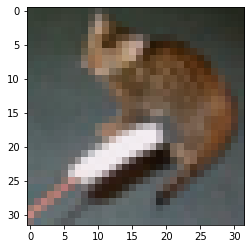

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   airplane
Prediction: automobile
Confidence: 67.74%


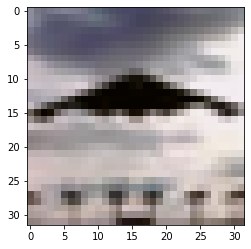

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   bird
Prediction: bird
Confidence: 89.86%


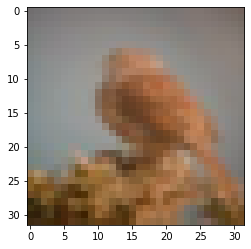

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   automobile
Prediction: automobile
Confidence: 77.66%


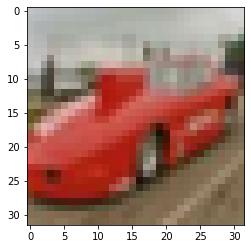


Expected:   cat
Prediction: cat
Confidence: 73.68%


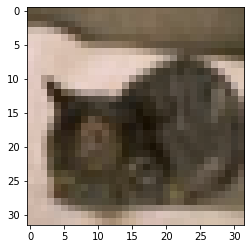


Expected:   airplane
Prediction: airplane
Confidence: 90.34%


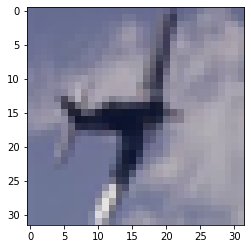

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   bird
Prediction: bird
Confidence: 53.38%


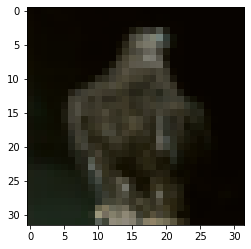

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: bird
Confidence: 53.15%


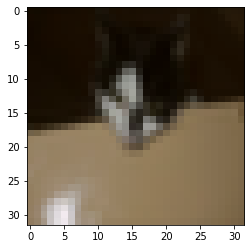


Expected:   automobile
Prediction: automobile
Confidence: 81.94%


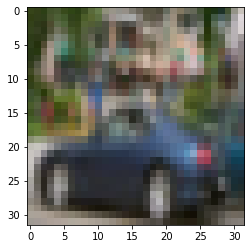


Expected:   bird
Prediction: bird
Confidence: 89.26%


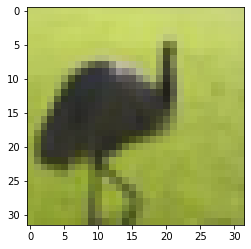

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   airplane
Prediction: bird
Confidence: 84.92%


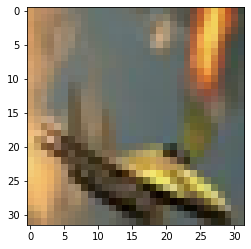

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: cat
Confidence: 94.12%


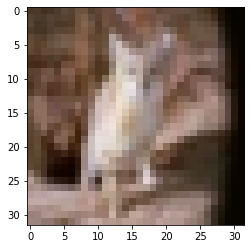


Expected:   bird
Prediction: airplane
Confidence: 84.49%


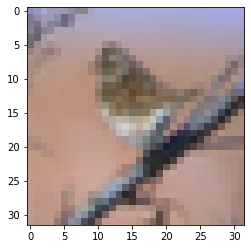

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   automobile
Prediction: airplane
Confidence: 49.94%


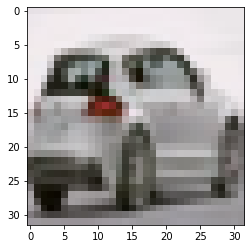


Expected:   automobile
Prediction: automobile
Confidence: 37.21%


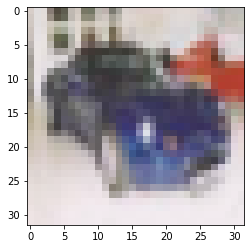


Expected:   bird
Prediction: cat
Confidence: 53.76%


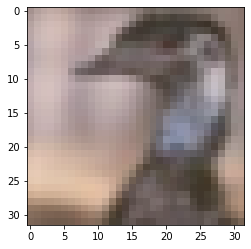


Expected:   bird
Prediction: bird
Confidence: 84.31%


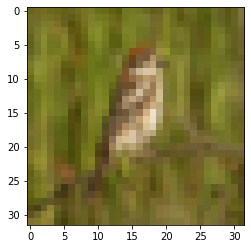

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   cat
Prediction: cat
Confidence: 79.52%


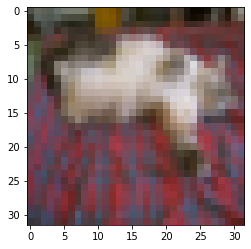

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   bird
Prediction: automobile
Confidence: 49.55%


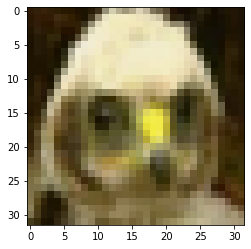

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   bird
Prediction: cat
Confidence: 96.86%


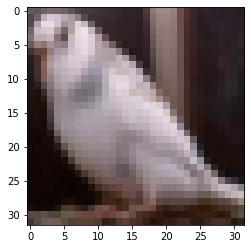

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   airplane
Prediction: airplane
Confidence: 54.58%


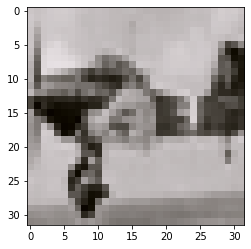


Expected:   airplane
Prediction: airplane
Confidence: 59.93%


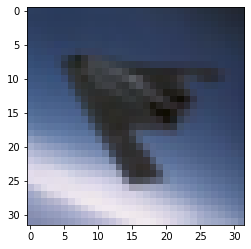


Expected:   bird
Prediction: cat
Confidence: 51.44%


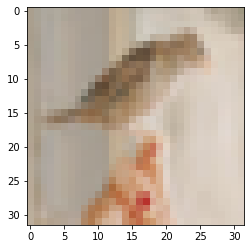


Expected:   bird
Prediction: bird
Confidence: 75.57%


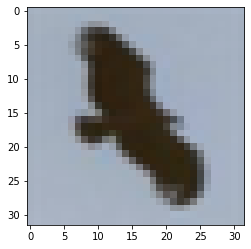

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Expected:   automobile
Prediction: automobile
Confidence: 93.85%


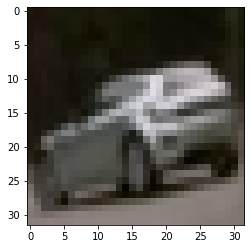


Expected:   airplane
Prediction: airplane
Confidence: 93.98%


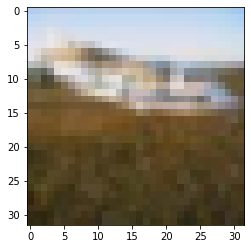


Expected:   cat
Prediction: cat
Confidence: 52.06%


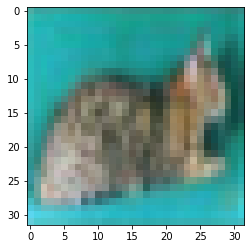

In [23]:
class_names = ['airplane','automobile','bird','cat']

iterator = iter(val_loader)
img, label = next(iterator)
out = lenet(img.to(dev))


confidences = torch.nn.functional.softmax(out, dim=1)
percentages = confidences * 100
_, indices = torch.sort(out, descending=True)


inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)
inv_tensor = inv_normalize(img)


for i in range(len(label)):
    print(f"Expected:   {class_names[label[i]]}")
    print(f"Prediction: {class_names[indices[i][0]]}")
    print(f"Confidence: {round(max(percentages[i].tolist()),2)}%")
    img = img / 2 + 0.5
    plt.figure()
    plt.imshow(inv_tensor[i].permute(1,2,0))
    plt.show()
    print()


Looking at the images with the predication im quite impressed with the performance. Its not that easy to make out what the picture is supposed to be. 